# **Lab 10A Discrete Optimization: Introduction to Mixed Integer Linear Programing**

By *Prof. N Hemachandra & R. Deval*

**Note:** *Try to get this practice sheet completed **within ~45 mins**.* In case, if you encounter any error to given snip code then as a task you need to rectify the error. \\

**Objective:** In this practice session, you will be introduced to discrete optimization which are discrete in nature specifically known as Mixed Integer Linear Program (MILP). A revist to linear program followed by a pyomo framework to solve MILP.

# **Revisiting Linear Program**
Given below is a standard linear program

\begin{align}
\min_{X} c^T x \\
\text{subject to} \\
Ax & \leq b \\
x & \geq l \\
x & \leq u
\end{align}

where, \\
$c, A, b, l$ and $u$ are the vector of cost coefficeint, $A$ is matrix of coefficient for constraints, $b$ is bound on constraints, $l$ and $u$ are bound on decision variables respectively.

Consider below program:

\begin{align}
\min_{x_1, x_2, x_3, x_4} x_1 + x_2 + x_3 + x_4 \\
\text{subject to} \\
x_1 + x_2 - x_4 & \leq 10 \\
-x_1 + x_3 & \leq 5 \\
x_1 & \leq 10 \\
x_2 & \leq 5 \\
x_3 & \leq 20 \\
x_4 & \leq -30 \\
\end{align}

## **Use following snip to code to perform task to create model, performing optimization of LP**

```python
# install pyomo library to collab enivronment
!pip -q install pyomo
# import pyomo and numpy library to collab session
from pyomo.environ import *
import numpy as np
```

In [ ]:
# install pyomo library to collab enivronment
!pip -q install pyomo
# import pyomo and numpy library to collab session
from pyomo.environ import *
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00


### Defining dataset for above above
```python
# No. of decision variables 4 (N), no. of constraints is 2 (M) with upper bound defined for decision varibles
N, M = 4, 2
# vector of cost coefficeint
c = np.array([1, 1, 1, 1])
# matrix of cofficient (array of an array); vector of resource constraints
A = np.array([[1, 1, 0, -1],[-1, 0, 1, 0]])
b = np.array([10, 5])
# upper bound for decision variables
u = np.array([10, 5, 20, -30])
```

In [ ]:
# No. of decision variables 4 (N), no. of constraints is 2 (M) with upper bound defined for decision varibles
N, M = 4, 2
# vector of cost coefficeint
c = np.array([1, 1, 1, 1])
# matrix of cofficient (array of an array); vector of resource constraints
A = np.array([[1, 1, 0, -1],[-1, 0, 1, 0]])
b = np.array([10, 5])
# upper bound for decision variables
u = np.array([10, 5, 20, -30])

### Creating pyomo model given formulation

```python
# creating an empty pyomo framework model
Model = ConcreteModel()
# defining number of decision variables
Model.x = Var(np.arange(N))
# setting the upper bound on decision variables
[Model.x[i].setub(u[i]) for i in range(N)]
# defining constraints as list of constraints
Model.constraints = ConstraintList()
# setting all two constraints along with the resource bounds
[Model.constraints.add(sum(A[i][j]*Model.x[j] for j in range(N)) <= b[i]) for i in range(M)]

Model.Objective = Objective(expr = sum(c[j]*Model.x[j] for j in range(N)))
# print your model
Model.pprint()

```

In [ ]:
Model = ConcreteModel()

Model.x = Var(np.arange(N))
[Model.x[i].setub(u[i]) for i in range(N)]
Model.constraints = ConstraintList()

[Model.constraints.add(sum(A[i][j]*Model.x[j] for j in range(N))<=b[i]) for i in range(M)]

Model.Objective = Objective(expr  = sum(c[j]*Model.x[j] for j in range(N)))

Model.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {1, 2}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    4 : {0, 1, 2, 3}

1 Var Declarations
    x : Size=4, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :    10 : False :  True :  Reals
          1 :  None :  None :     5 : False :  True :  Reals
          2 :  None :  None :    20 : False :  True :  Reals
          3 :  None :  None :   -30 : False :  True :  Reals

1 Objective Declarations
    Objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : x[0] + x[1] + x[2] + x[3]

1 Constraint Declarations
    constraints : Size=2, Index=constraints_index, Active=True
        Key : Lower : Body                           

### Import the `glpk` solver to solve above program is linear program

```python
# install glpk solver to local collab session
!apt-get -q install -y -qq glpk-utils
# use solvefactory to solve above constructed pyomo framework model

optLP = SolverFactory('glpk', execute = '/usr/bin/ glpsol')
result = optLP.solve(Model)
print(result)
```

In [ ]:
!apt-get -q install -y -qq glpk-utils

optLP = SolverFactory('glpk',execute ='/usr/bin/ glpsol' )

result = optLP.solve(Model)

print(result)

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 120875 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

### Defining function to print optimal solution

Below small snip to code will print optimal value for decision variables and optimal cost post optimization

```python
def OptResults(Model):
  # display solution
  print('\nObjective = ', Model.Objective())

  print('\nDecision Variables')
  for i in np.arange(N):
    print('x[',i,'] = ', Model.x[i].value)
  print('\nConstraints')
  Model.constraints.display()
```

In [ ]:
def OptResults(Model):

  print('\nObjective = ', Model.Objective())

  print('\nDecision Variables')
  for i in np.arange(N):

    print('x[',i,'] = ', Model.x[i].value)

  print('\nConstraints')
  Model.constraints.display()


### Printing optimal solution for optimization above formualtion


```python
OptResults(Model)
```

In [ ]:
OptResults(Model)


ERROR:pyomo.common.numeric_types:evaluating object as numeric value: x[0]
    (object: <class 'pyomo.core.base.var._GeneralVarData'>)
No value for uninitialized NumericValue object x[0]


ValueError: ignored

### Changing sense of optimization

Note: Above formulation gives an infeasible solution, instead of minimization of above formulation; suppose mistakenly we perform minimization instead of maximization above formulation. We can simply correct above formulation by changing sense of objective.

```python
# changing sense of optimization
Model.Objective.set_sense(maximize)
# pprint the above modified model as
Model.pprint()
# solve your formulation as
result = optLP.solve(Model)
print(result)
# printing optimal solution
OptResults(Model)
```

In [ ]:
Model.Objective.set_sense(maximize)

Model.pprint()

result = optLP.solve(Model)
print(result)

OptResults(Model)

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {1, 2}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    4 : {0, 1, 2, 3}

1 Var Declarations
    x : Size=4, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :    10 : False :  True :  Reals
          1 :  None :  None :     5 : False :  True :  Reals
          2 :  None :  None :    20 : False :  True :  Reals
          3 :  None :  None :   -30 : False :  True :  Reals

1 Objective Declarations
    Objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : x[0] + x[1] + x[2] + x[3]

1 Constraint Declarations
    constraints : Size=2, Index=constraints_index, Active=True
        Key : Lower : Body                           

### Changing bounds on the decision variables

Suppose we want to change bound on decision variable $x_4$ to -10, following snip can be taken into account to perform such task

```python
# recall indexing for decision variable starts from 0 not from 1 itself
Model.x[3].setub(-10)
Model.pprint()
result = optLP.solve(Model)
print(result)
# printing optimal solution
OptResults(Model)
```

In [ ]:
Model.x[3].setub(-10)
Model.pprint()
result = optLP.solve(Model)
print(result)

OptResults(Model)

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {1, 2}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    4 : {0, 1, 2, 3}

1 Var Declarations
    x : Size=4, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  10.0 :    10 : False : False :  Reals
          1 :  None : -30.0 :     5 : False : False :  Reals
          2 :  None :  15.0 :    20 : False : False :  Reals
          3 :  None : -30.0 :   -10 : False : False :  Reals

1 Objective Declarations
    Objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : x[0] + x[1] + x[2] + x[3]

1 Constraint Declarations
    constraints : Size=2, Index=constraints_index, Active=True
        Key : Lower : Body                           

### Deactivating a constraint into exisiting pyomo framework

Suppose we do not want consider a particular constraint to determine optimal solution. So, we can simply deactivate that constraint using `Model.constraints[i].deactivate()` for any `i` constraint.



```python
# deactivating first constraint
Model.constraints[1].deactivate()
# printing modified model with deactivated first constraint, note activity in that corresponding constraint will be False instead of True.
Model.pprint()
# solving model for optmality
result = optLP.solve(Model)
print(result)
# printing optimal solution
OptResults(Model)
```

In [ ]:
Model.constraints[1].deactivate()

Model.pprint()

result = optLP.solve(Model)

print(result)

OptResults(Model)

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {1, 2}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    4 : {0, 1, 2, 3}

1 Var Declarations
    x : Size=4, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  10.0 :    10 : False : False :  Reals
          1 :  None : -10.0 :     5 : False : False :  Reals
          2 :  None :  15.0 :    20 : False : False :  Reals
          3 :  None : -10.0 :   -10 : False : False :  Reals

1 Objective Declarations
    Objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : x[0] + x[1] + x[2] + x[3]

1 Constraint Declarations
    constraints : Size=2, Index=constraints_index, Active=True
        Key : Lower : Body                           

## **using `cbc` solver to solve above formulation instead of `glpk` solver**.

Why do we need to move to cbc solver?



```python
# installing cbc solver to collab session
!apt-get -q install -y -qq coinor-cbc
# optCBC is will be used to solver above pyomo framework using
optCBC = SolverFactory('cbc')

resultCBC = optCBC.solve(Model)
print(resultCBC)
OptResultCBC = OptResults(Model)
```

In [ ]:
!apt-get -q install -y -qq coinor-cbc

optCBC = SolverFactory('cbc')

resultCBC = optCBC.solve(Model)
print(resultCBC)

OptResultCBC = OptResults(Model)

Selecting previously unselected package coinor-libcoinutils3v5:amd64.
(Reading database ... 121078 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-2_amd64.deb ...
Unpacking coinor-libcoinutils3v5:amd64 (2.11.4+repack1-2) ...
Selecting previously unselected package coinor-libosi1v5:amd64.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-2_amd64.deb ...
Unpacking coinor-libosi1v5:amd64 (0.108.6+repack1-2) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1:amd64.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-3_amd64.deb ...
Unpacking coinor-libcgl1:amd64 (0.60.3+repack1-3) ...
Selecting previously unselected package coinor-libcbc3:amd64.
Preparing to unpack .../4-coinor-libcbc3_2.10.7+ds1-1_amd64.deb ...
Unpacking coinor-libcbc3:

 # **Introduction to MILP**

Given below is a standard **Integer Linear Program (ILP)**

\begin{align}
\min_{X} c^T x \\
\text{subject to} \\
Ax & \leq b \\
x & \in \Bbb Z^n
\end{align}

In above formulation, $x$ is purely a integer decision variable.

Consider below program and feasible region corresponding to given constraints for two decision variables:

\begin{align}
\max_{x,y} y \\
\text{s.t.} \\
-x + y & \leq 1 \\
2x + 3y & \leq 12 \\
3x + 2y & \leq 12 \\
x, y & \geq 0 \\
x, y & \in \Bbb Z
\end{align}



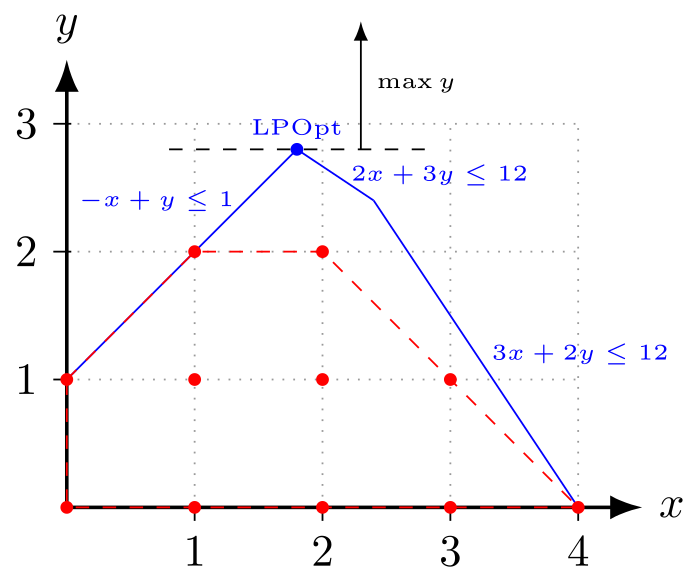

Let's try to solve given formulation using pyomo framework and `cbc` solver.

Since, we have already imported pyomo and cbc solver above, we will continue directly construct pyomo model.

```python
# Defining dataset to be used in model; incase not defined above use below libraries again

# install pyomo library to collab enivronment
!pip -q install pyomo
# import pyomo and numpy library to collab session
from pyomo.environ import *
import numpy as np

# number of variables N(=2) and number of constraints M(=3)
N, M = 2, 3
# vector of cost cofficient
c = np.array([0,1])
# matrix of matrix for coefficient of constraints and vector of resource constraints
A = np.array([[-1,1], [3, 2], [2, 3]])
b = np.array([1, 12, 12])
# defining empty pyomo model as ILP_Model
ILP_Model = ConcreteModel()
# variable are defined as NonNegativeIntegers
ILP_Model.x = Var(np.arange(N), domain = NonNegativeIntegers)
# Constraints as defined using constraint list
ILP_Model.constraints = ConstraintList()
[ILP_Model.constraints.add(sum(A[i][j]*ILP_Model.x[j] for j in range(N)) <= b[i]) for i in range(M)]
# objective for above formulation defined
ILP_Model.Objective = Objective(expr = sum(c[j]*ILP_Model.x[j] for j in range(N)), sense = maximize)
# printing your formulation
ILP_Model.pprint()

```

In [ ]:

# install pyomo library to collab enivronment
!pip -q install pyomo
# import pyomo and numpy library to collab session
from pyomo.environ import *
import numpy as np

# number of variables N(=2) and number of constraints M(=3)
N, M = 2, 3
# vector of cost cofficient
c = np.array([0,1])
# matrix of matrix for coefficient of constraints and vector of resource constraints
A = np.array([[-1,1], [3, 2], [2, 3]])
b = np.array([1, 12, 12])
# defining empty pyomo model as ILP_Model
ILP_Model = ConcreteModel()
# variable are defined as NonNegativeIntegers
ILP_Model.x = Var(np.arange(N), domain = NonNegativeIntegers)
# Constraints as defined using constraint list
ILP_Model.constraints = ConstraintList()
[ILP_Model.constraints.add(sum(A[i][j]*ILP_Model.x[j] for j in range(N)) <= b[i]) for i in range(M)]
# objective for above formulation defined
ILP_Model.Objective = Objective(expr = sum(c[j]*ILP_Model.x[j] for j in range(N)), sense = maximize)
# printing your formulation
ILP_Model.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {1, 2, 3}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {0, 1}

1 Var Declarations
    x : Size=2, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : NonNegativeIntegers
          1 :     0 :  None :  None : False :  True : NonNegativeIntegers

1 Objective Declarations
    Objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 0*x[0] + x[1]

1 Constraint Declarations
    constraints : Size=3, Index=constraints_index, Active=True
        Key : Lower : Body            : Upper : Active
          1 :  -Inf :   - x[0] + x[1] :   1.0 :   True
          2 :  -Inf : 3*x[0] + 2*x[1] :  12.0 :   True

```python

# installing cbc solver to collab session
!apt-get -q install -y -qq coinor-cbc
# optCBC is will be used to solver above pyomo framework using
optCBC = SolverFactory('cbc')

resultCBC = optCBC.solve(ILP_Model)
print(resultCBC)


# snip to code for a function to print optimal solution as an output
def OptResults(Model):
  # display solution
  print('\nObjective = ', Model.Objective())

  print('\nDecision Variables')
  for i in np.arange(N):
    print('x[',i,'] = ', Model.x[i].value)
  print('\nConstraints')
  Model.constraints.display()

ILP_ModelSolution = OptResults(ILP_Model)

```

In [ ]:
optCBC = SolverFactory('cbc')
resultCBC = optCBC.solve(ILP_Model)
print(resultCBC)

def OptResults(Model):
  print('\nObjective = ', Model.Objective())

  print('\nDecision Variables')
  for i in np.arange(N):
    print('x[',i,'] = ', Model.x[i].value)
  print('\nConstraints')
  Model.constraints.display()

ILP_ModelSolution = OptResults(ILP_Model)



Problem: 
- Name: unknown
  Lower bound: 2.0
  Upper bound: 2.0
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 2
  Number of binary variables: 0
  Number of integer variables: 2
  Number of nonzeros: 1
  Sense: maximize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.01
  Wallclock time: 0.02
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
    Black box: 
      Number of iterations: 0
  Error rc: 0
  Time: 0.04369044303894043
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Objective =  2.0

Decision Variables
x[ 0 ] =  1.0
x[ 1 ] =  2.0

Constraints
constraints : Size=3
    Key : Lower : Body : Upper
      1 :  None :  1.0 :   1.0
      2 :  None :  7.0 :  12.0
      3 :  None :  8.0 :  12.0


Above, we have solved an Integer Linear Program. But, in real we can have variants of Integer Linear Program where we need to deal with mix of both integer, real and binary variables which are known as **Mixed Integer (Non) Linear Program** (MILP). These particular type of formulation are widely used in real life to model real life processes including production planning, scheduling, telecomunication, energy optimization, e.t.c.
In this lab, we will restrict ourselves to only MILP and below is a toy problem in form of MILP.


### **Mixed Integer Linear Program (MILP)**

\begin{align}
\max_{x_1,x_2, x_3, x_4, x_5} 100x_1 + 55x_2 + 76x_3 + 82x_4 - 44x_5  \\
\text{s.t.} \\
x_1 + x_2 - x_3 + x_5 & \geq 100 \\
x_1 & \in [0, 10] \\
x_2 & \in [-85, 21] \\
x_3 & \in [-∞,30] \\
x_4 & \in \{0,1 \} \\
x_5 & \in \Bbb Z^+
\end{align}



```python
# install pyomo library to collab enivronment
!pip -q install pyomo
# import pyomo and numpy library to collab session
from pyomo.environ import *
import numpy as np
```

```python
# number of variables N(=5) and number of constraints M(=1)
N, M = 5, 1
# vector of cost cofficient
c = np.array([100, 55, 76, 82, -44])
# matrix of matrix for coefficient of constraints and vector of resource constraints
A = np.array([[1, 1, -1, 0, 1]])
b = np.array([100])
# defining empty pyomo model as ILP_Model
MILP_Model = ConcreteModel()
```

In [ ]:
N , M = 5, 1

c = np.array([100,55,76,82,-44])

A = np.array([[1,1,-1,0,1]])

b= np.array([100])

MILP_Model = ConcreteModel()


```python
#common domain types in pyomo
#Reals, PositiveReals, NonPositiveReals, NegativeReals, NonNegativeReals,
#Integers, PositiveIntegers, NonPositiveIntegers,
#NegativeIntegers, NonNegativeIntegers, Binary
```

```python
MILP_Model.x1 = Var(domain = Reals, bounds=(0,10))
MILP_Model.x2 = Var(domain = Reals, bounds=(-85,21))
MILP_Model.x3 = Var(domain = Reals, bounds=(-np.inf,30))
MILP_Model.x4 = Var(domain = Binary, bounds= (0,1))
MILP_Model.x5 = Var(domain = NonNegativeIntegers, bounds=(0, np.inf))
```

In [ ]:


MILP_Model.x1 = Var(domain = Reals, bounds=(0,10))
MILP_Model.x2 = Var(domain = Reals, bounds=(-85,21))
MILP_Model.x3 = Var(domain = Reals, bounds=(-np.inf,30))
MILP_Model.x4 = Var(domain = Binary, bounds= (0,1))
MILP_Model.x5 = Var(domain = NonNegativeIntegers, bounds=(0, np.inf))



```python
varIndex = [MILP_Model.x1, MILP_Model.x2, MILP_Model.x3, MILP_Model.x4, MILP_Model.x5]
```

In [ ]:


varIndex = [MILP_Model.x1, MILP_Model.x2, MILP_Model.x3, MILP_Model.x4, MILP_Model.x5]



```python
MILP_Model.const = Constraint(expr = sum(A[0][j]*varIndex[j]  for j in range(N))>= b[0])

MILP_Model.objective = Objective(expr = sum(c[j]*varIndex[j] for j in range(N)), sense = maximize)

MILP_Model.pprint()

```

In [ ]:
MILP_Model.const = Constraint(expr = sum(A[0][j]*varIndex[j]  for j in range(N))>= b[0])

MILP_Model.objective = Objective(expr = sum(c[j]*varIndex[j] for j in range(N)), sense = maximize)

MILP_Model.pprint()



5 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :    10 : False :  True :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :   -85 :  None :    21 : False :  True :  Reals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :    30 : False :  True :  Reals
    x4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :     1 : False :  True : Binary
    x5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeIntegers

1 Objective Declarations
    objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 100*x1 + 55*x2 + 76*x3 + 82*x4 - 44*x5

1 Constraint 

```python
# installing cbc solver to collab session
!apt-get -q install -y -qq coinor-cbc

# optCBC is will be used to solver above pyomo framework using
optCBC = SolverFactory('cbc')

resultCBC = optCBC.solve(MILP_Model)
print(resultCBC)
```

In [ ]:
# optCBC is will be used to solver above pyomo framework using
optCBC = SolverFactory('cbc')

resultCBC = optCBC.solve(MILP_Model)
print(resultCBC)


Problem: 
- Name: unknown
  Lower bound: 161.0
  Upper bound: 161.0
  Number of objectives: 1
  Number of constraints: 1
  Number of variables: 4
  Number of binary variables: 1
  Number of integer variables: 2
  Number of nonzeros: 4
  Sense: maximize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
    Black box: 
      Number of iterations: 0
  Error rc: 0
  Time: 0.0178830623626709
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



```python
for i in varIndex:
  print(i.value)
```

In [ ]:


for i in varIndex:
  print(i.value)



10.0
21.0
30.0
1.0
99.0
